# Hypothesis Testing Exercises

Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.


## 1). Has the network latency gone up since we switched internet service providers?


Ho (Null Hypothesis): Network latency has gone up begining on date internet service providers (ISP) were switched. 
    
H1 (Alternate Hypothesis): Network latency has not gone up begining on date internet service providers were switched.
    
True +ve: Accepting the Ho as expected since data inference sugest the network laterncy has gone up due to switching ISP. 
    
True -ve: We accept Ho but the cause for network latency was not attributed to the switching of ISP. Could be the weather, distance from the tower, a new service plan, e.t.c. that coincided with the switching of ISP.

Type I Error (False +ve): Reject Ho that network laterncy has not gone up (adapt H1) yet there is evidence inferred from data that this is not true. Swithching providers did not make network latency rise. 

Type II Error (False -ve): Failed to reject Ho above yet inference from statistical data suggest we should reject Ho and adapt H1 



## 2). Is the website redesign any good?

Good cannot be measured statistically. It has to be converted to 


Ho (Null Hypothesis): Website redesign has resulted in higher sales return 
    
H1 (Alternate Hypothesis): Website redesign did not affect sales return
    
True +ve: Accept Ho as inferred by statistical data
    
True -ve: Accept Ho but the cause os sales increase was not necessarily caused by the re-design.
    
Type I Error (False +ve): Rejected Ho above when inferred data sugest we should have kept the hypothesis 
    
Type II Error (False -ve): Did not reject Ho yet we should have. Website redesign did not affect sales return
    


## 3). Is our television ad driving more sales?


Ho (Null Hypothesis): Listing our ad on television has resulted in increased sales.
    
H1 (Alternate Hypothesis): Listing our ad on television did not result in increased sales.
    
True +ve: Increased sales was directlty as a result in increased sales. Accept Ho
    
True -ve: Increased sales was as a result of listing our tv ad. Other factors caused the spike in sales
    
Type I Error (False +ve): Adapted H1 
    
Type II Error (False -ve):

# T-TEST EXERCISES

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
import pandas as pd

from scipy import stats
from pydataset import data

import env



# Exercise #1

Ace Realty wants to determine whether the average time it takes to sell homes is different for 
its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard 
deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a 
standard deviation of 20 days. Use a .05 level of significance.


Ho: Office #1 average time to sell a home = average time to sell a home

H1: Office #1 average time to sell a home != average time to sell a home


In [158]:
alpha = 0.05

mean_office_one = 90
std_office_one = 15
sales_office_one = 40

mean_office_two = 100 
std_office_two = 20
sales_office_two = 50

office_one = np.random.normal(mean_office_one, std_office_one, sales_office_one)

office_two = np.random.normal(mean_office_two, std_office_two, sales_office_two)


# print("Office One Varriance: ", office_one.var(), "\nOffice Two Varriance: ", office_two.var())

t, p = stats.ttest_ind(office_one, office_two, equal_var = False)

t, p/ 2


(-1.9420558076998378, 0.027671130804336405)

In [185]:
# Decision:

print("This is a comparison of mean average time to sell a home by Ace Reator with two office locations")
print()
print("_______________________________________________________________________________________________")
print("Hypothesis testing of two sample mean with two tails")
print()
print("Determine: \n\n\t is P / 2:- ", (p / 2) < alpha)
print("\t t > 0:- ", t > 0)

print()
print("--------------------------Answer Begin-----------------------------")
print()
# Hypothesis Logic

Ho = "Office #1 average time to sell a home = average time to sell a home"

H1 = "Office #1 average time to sell a home != average time to sell a home"

if(p / 2) > alpha:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {Ho}")
    
elif t < 0:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {Ho}")
    
else:
    
    print("REJECT Ho")
    
print()

print("--------------------------Answer End-----------------------------")


This is a comparison of mean average time to sell a home by Ace Reator with two office locations

_______________________________________________________________________________________________
Hypothesis testing of two sample mean with two tails

Determine: 

	 is P / 2:-  True
	 t > 0:-  False

--------------------------Answer Begin-----------------------------

FAILED TO REJECT Ho: (Adapted Hypothesis)-> Office #1 average time to sell a home = average time to sell a home

--------------------------Answer End-----------------------------


# Exercise #2
Load the mpg dataset and use it to answer the following questions:

 -> Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

 -> Are compact cars more fuel-efficient than the average car?
    
 -> Do manual cars get better gas mileage than automatic cars?


In [233]:
mpg = data('mpg')
mpg


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [234]:
mpg["average_mpg"] = ((mpg["cty"] + mpg["hwy"]) / 2)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [235]:
mpg = pd.DataFrame(mpg)

mpg.year.value_counts()


1999    117
2008    117
Name: year, dtype: int64

## A). -> Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


HYPOTHESIS: 
H0: Cars manufactured in 2008 have higher fuel efficiency than cars manufactured in 1999

H1: Cars manufactured in 2008 have lower fuel efficiency than cars manufactured in 1999

In [262]:
mpg_model_08 = mpg[mpg.year == 2008].average_mpg
mpg_model_99 = mpg[mpg.year == 1999].average_mpg

mpg_model_08, mpg_model_99


(3      25.5
 4      25.5
 7      22.5
 10     24.0
 11     23.0
 14     21.0
 15     20.0
 17     21.0
 18     19.5
 19     17.0
 20     13.0
 21     17.0
 23     14.5
 26     21.0
 27     20.0
 28     19.5
 29     16.5
 30     12.5
 34     26.0
 36     23.5
 37     21.5
 42     20.5
 43     20.5
 44     14.0
 47     19.5
 48     19.5
 49     17.0
 50     16.0
 53     16.5
 54     16.5
 55     10.5
 59     15.0
 60     10.5
 61     15.0
 63     15.5
 65     14.0
 66     10.5
 67     15.0
 68     15.0
 69     14.0
 70     10.5
 73     15.0
 77     15.0
 81     16.0
 82     16.0
 88     15.0
 90     15.0
 93     21.5
 94     20.0
 97     19.0
 98     18.5
 99     17.0
 105    30.0
 106    30.5
 107    30.0
 108    25.0
 111    25.5
 112    26.0
 115    23.5
 118    24.0
 119    23.5
 120    20.5
 121    20.0
 122    20.5
 123    19.5
 124    17.0
 127    10.5
 128    16.5
 129    15.5
 130    12.5
 132    15.0
 133    15.0
 137    15.0
 139    16.0
 140    16.0
 144    27.0
 145    27.5

In [266]:
print("2008 Var: ",mpg_model_08.var())
print("1999 Var: ", mpg_model_99.var())


2008 Var:  24.097480106100797
1999 Var:  27.122605363984682


In [267]:
t, pval = stats.ttest_ind(mpg_model_08, mpg_model_99, equal_var = False)
t, pval

(-0.21960177245940962, 0.8263750772060638)

In [269]:
# Decision:

print("Average MPG 2008 vs 1999")
print()
print("____________________________________")
print("Hypothesis testing of two sample mean with two tails")
print()
print("Determine: \n\n\t is P / 2:- ", (pval / 2) < alpha)
print("\t t > 0:- ", t > 0)

print()
print("--------------------------Answer Begin-----------------------------")
print()
# Hypothesis Logic

Ho = "Cars manufactured in 2008 have higher fuel efficiency than cars manufactured in 1999"

H1 = "Cars manufactured in 2008 have lower fuel efficiency than cars manufactured in 1999"

if(pval / 2) > alpha:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {Ho}")
    
elif t < 0:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {Ho}")
    
else:
    
    print("REJECT Ho")
    
print()

print("--------------------------Answer End-----------------------------")

Average MPG 2008 vs 1999

____________________________________
Hypothesis testing of two sample mean with two tails

Determine: 

	 is P / 2:-  False
	 t > 0:-  False

--------------------------Answer Begin-----------------------------

FAILED TO REJECT Ho: (Adapted Hypothesis)-> Cars manufactured in 2008 have higher fuel efficiency than cars manufactured in 1999

--------------------------Answer End-----------------------------


## B). -> Are compact cars more fuel-efficient than the average car?

H0: Compact cars average fuel efficiency = average fuel efficiency in non-compact cars

H1: Compact cars average fuel efficiency != average fuel efficiency in non-compact cars



In [275]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [285]:
# Rename class to class_type

mpg = mpg.rename(columns={"class":"class_type"})
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class_type,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [290]:
compact_cars_fuel_efficiency = mpg[mpg.class_type == 'compact'].average_mpg

non_compact_cars_fuel_efficiency = mpg[mpg.class_type != 'compact'].average_mpg

print(compact_cars_fuel_efficiency,non_compact_cars_fuel_efficiency)

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
6      22.0
7      22.5
8      22.0
9      20.5
10     24.0
11     23.0
12     20.0
13     21.0
14     21.0
15     20.0
142    25.0
143    23.0
170    22.5
171    23.5
172    22.0
173    23.5
187    24.0
188    25.0
189    26.0
190    26.5
191    22.0
192    22.0
193    22.5
194    27.0
195    28.5
196    30.5
197    32.5
198    30.5
208    25.0
209    22.5
210    25.0
211    25.5
212    20.5
213    38.5
214    25.0
215    22.5
216    25.5
217    25.0
218    25.0
219    25.0
220    19.5
221    20.5
Name: average_mpg, dtype: float64 16     19.5
17     21.0
18     19.5
19     17.0
20     13.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: average_mpg, Length: 187, dtype: float64


In [294]:
# Check variance

print("Compact cars var: ", compact_cars_fuel_efficiency.var())
print("Non Compact cars var: ", non_compact_cars_fuel_efficiency.var())


Compact cars var:  12.442876965772433
Non Compact cars var:  23.652794548904602


In [299]:
# Using two sample t-tes

t_compact, pval_compact = stats.ttest_ind(compact_cars_fuel_efficiency, non_compact_cars_fuel_efficiency, equal_var = False)
t_compact, pval_compact

(8.128810422808078, 1.6018060656123074e-12)

In [302]:
# Decision:

print("Average MPG Compact cars vs Non-compact cars")
print()
print("____________________________________")
print("Hypothesis testing of two sample mean with two tails")
print()
print("Determine: \n\n\t is P / 2:- ", (pval_compact / 2) < alpha)
print("\t t > 0:- ", t_compact > 0)

print()
print("--------------------------Answer Begin-----------------------------")
print()
# Hypothesis Logic

Ho = "Compact cars average fuel efficiency = average fuel efficiency in non-compact cars"

H1 = "Compact cars average fuel efficiency != average fuel efficiency in non-compact cars"

if(pval_compact / 2) > alpha:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {Ho}")
    
elif t_compact < 0:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {Ho}")
    
else:
    
    print("REJECT Ho & adapt H1")
    
print()

print("--------------------------Answer End-----------------------------")

Average MPG Compact cars vs Non-compact cars

____________________________________
Hypothesis testing of two sample mean with two tails

Determine: 

	 is P / 2:-  True
	 t > 0:-  True

--------------------------Answer Begin-----------------------------

REJECT Ho & adapt H1

--------------------------Answer End-----------------------------


## C). -> Do manual cars get better gas mileage than automatic cars?

H0: Manual car average gas mileage = average gas mileage for automatic cars
H1: Manual car average gas mileage != average gas mileage for automatic cars


In [304]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class_type,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [327]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [367]:
def avg_mpg_manual_cars():
    
    manual_cars = []
    
    avg_manual_m6 = mpg[mpg.trans == 'manual(m6)'].average_mpg
    avg_manual_m5 = mpg[mpg.trans == 'manual(m5)'].average_mpg
    
    manuals = [avg_manual_m6, avg_manual_m5]
    
    return pd.concat(manuals)

avg_mpg_manual_cars()

def avg_mpg_automatic_cars():
    
    automatic_cars = []
    
    avg_automatic_15 = mpg[mpg.trans == 'auto(15)'].average_mpg
    avg_automatic_s6 = mpg[mpg.trans == 'auto(s6)'].average_mpg
    avg_automatic_16 = mpg[mpg.trans == 'auto(16)'].average_mpg
    avg_automatic_av = mpg[mpg.trans == 'auto(av)'].average_mpg
    avg_automatic_s5 = mpg[mpg.trans == 'auto(s5)'].average_mpg
    avg_automatic_s4 = mpg[mpg.trans == 'auto(s4)'].average_mpg
    avg_automatic_13 = mpg[mpg.trans == 'auto(13)'].average_mpg

    avg_mpg_automatic_cars = [avg_automatic_15, avg_automatic_s6, avg_automatic_16, 
                      avg_automatic_av, avg_automatic_s5, avg_automatic_s4, 
                      avg_automatic_13]
    
    return pd.concat(avg_mpg_automatic_cars)

avg_mpg_manual_cars()
avg_mpg_automatic_cars()

3      25.5
10     24.0
15     20.0
24     21.0
26     21.0
28     19.5
49     17.0
65     14.0
69     14.0
70     10.5
99     17.0
108    25.0
121    20.0
145    27.5
146    23.0
206    16.5
210    25.0
217    25.0
231    25.0
2      25.0
6      22.0
8      22.0
13     21.0
52     15.5
56     14.0
72     13.5
79     17.0
85     15.5
86     14.5
91     22.0
93     21.5
96     18.5
97     19.0
100    30.5
102    28.5
103    26.0
105    30.0
110    22.5
112    26.0
114    22.0
117    24.0
118    24.0
122    20.5
142    25.0
149    22.0
152    16.0
160    21.5
162    23.5
163    22.0
167    22.5
168    22.5
172    22.0
173    23.5
174    17.5
177    16.0
180    25.0
182    26.0
185    22.0
188    25.0
189    26.0
192    22.0
196    30.5
197    32.5
201    17.5
203    19.5
204    16.0
208    25.0
212    20.5
213    38.5
214    25.0
219    25.0
221    20.5
222    39.5
224    25.0
226    24.0
228    25.0
233    22.0
Name: average_mpg, dtype: float64

In [362]:
# Var Manual Cars
manual_cars().var()

26.635167464114833

In [364]:
# Var Automatic Cars
automatic_cars().var()

11.915242165242164

In [369]:
t_man_auto, p_man_auto = stats.ttest_ind(manual_cars(), automatic_cars(), equal_var = False)
t_man_auto, p_man_auto

(0.4022557985499306, 0.6887507424704394)

In [370]:
# Decision:

print("Average MPG Manual cars vs Automatic cars")
print()
print("____________________________________")
print("Hypothesis testing of two sample mean with two tails")
print()
print("Determine: \n\n\t is P / 2:- ", (p_man_auto / 2) < alpha)
print("\t t > 0:- ", t_man_auto > 0)

print()
print("--------------------------Answer Begin-----------------------------")
print()
# Hypothesis Logic

H0 = "Manual car average gas mileage = average gas mileage for automatic cars"

H1 = "Manual car average gas mileage != average gas mileage for automatic cars"

if(p_man_auto / 2) > alpha:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {H0}")
    
elif t_man_auto < 0:
    
    print(f"FAILED TO REJECT Ho: (Adapted Hypothesis)-> {H0}")
    
else:
    
    print("REJECT Ho & adapt H1")
    
print()

print("--------------------------Answer End-----------------------------")

Average MPG Manual cars vs Automatic cars

____________________________________
Hypothesis testing of two sample mean with two tails

Determine: 

	 is P / 2:-  False
	 t > 0:-  True

--------------------------Answer Begin-----------------------------

FAILED TO REJECT Ho: (Adapted Hypothesis)-> Manual car average gas mileage = average gas mileage for automatic cars

--------------------------Answer End-----------------------------


# Refference
Null Hypothesis	------ H0: μa == μb

Alternative Hypothesis (2-tail, significantly different)------ Ha: μa != μb
    
Alternative Hypothesis (1-tail, a is significantly smaller than b)------- Ha: μa < μb
    
Alternative Hypothesis (1-tail, a is significantly larger than b)------- Ha: μa < μb


# CLASS NOTES BELOW

In [16]:

np.random.seed(123)

n_dice_per_experiment = ncols = 10
n_experiments = nrows = 100

data = np.random.randint(1, 7, (nrows, ncols))

data[:4]


array([[6, 3, 5, 3, 2, 4, 3, 4, 2, 2],
       [1, 2, 2, 1, 1, 2, 4, 6, 5, 1],
       [1, 5, 2, 4, 3, 5, 3, 5, 1, 6],
       [1, 2, 4, 5, 5, 5, 2, 6, 4, 3]])

In [17]:
calculated_averages = data.mean(axis=1)
calculated_averages


array([3.4, 2.5, 3.5, 3.7, 3.2, 4.7, 3.4, 3.2, 3.4, 3. , 3.7, 3.5, 4. ,
       4.5, 2.9, 2.8, 2.9, 3.8, 3.2, 3.6, 3.4, 4. , 3.5, 3.3, 3.6, 3. ,
       4.3, 3. , 3.3, 3.2, 4.2, 3.9, 3.2, 3.8, 3.6, 3.4, 2.7, 3.4, 3.2,
       3.1, 3.2, 3. , 4.1, 3.3, 3. , 4.1, 3.4, 3.3, 2.9, 3.8, 3.4, 3.6,
       3.9, 3.2, 4.7, 3.8, 3.5, 2.8, 3.8, 4.7, 4.1, 3.5, 2.8, 3.7, 3.4,
       3.7, 3.6, 4.1, 3.6, 3.5, 2.9, 4. , 3.2, 3.4, 4.4, 2.9, 3.2, 3.9,
       1.9, 3. , 3. , 3.5, 3.3, 4.4, 3.4, 4.2, 4.1, 3.2, 3.5, 3.5, 3.8,
       3.1, 3.6, 2.9, 2.9, 4. , 3.3, 3.1, 3.4, 3.6])

Text(0.5, 1.0, 'Outcome of averaging 10 dice rolls 100 times')

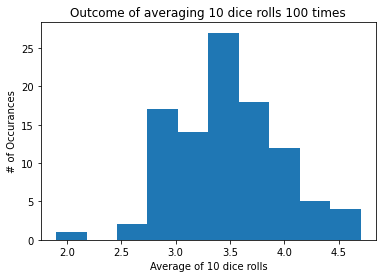

In [18]:
plt.hist(calculated_averages)
plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('# of Occurances')
plt.title(f'Outcome of averaging {n_dice_per_experiment} dice rolls {n_experiments} times')


In [19]:
import env

db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', db_url)

df.columns


Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

<AxesSubplot:>

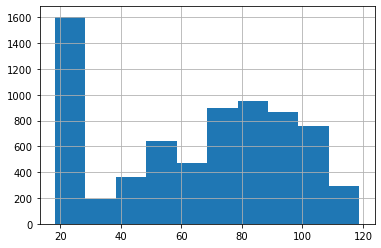

In [20]:
# Distribution of ALL Monthly Customers (POPULATION)

df.monthly_charges.hist()

<AxesSubplot:>

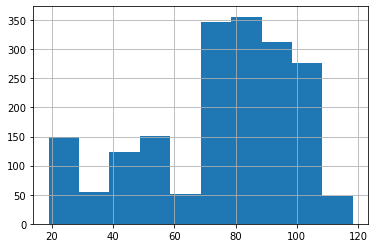

In [23]:
# Churned Customers (SAMPLE)

churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()

<AxesSubplot:>

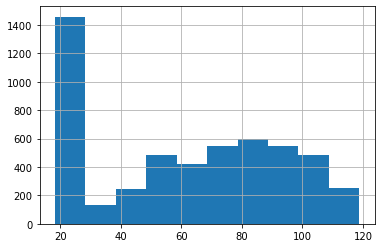

In [24]:
no_churn_sample = df[df.churn == 'No'].monthly_charges

no_churn_sample.hist()


In [25]:
print("Churned: ",churn_sample.shape, "Non Churned: ", no_churn_sample.shape)

Churned:  (1869,) Non Churned:  (5174,)


# Set Hypothesis

H0: Mean of monthly charges of churned customers = Mean of monthly charges of customers who haven't churned

Ha: Mean of monthly charges of churned customers > Mean of monthly charges of customers who haven't churned

<AxesSubplot:>

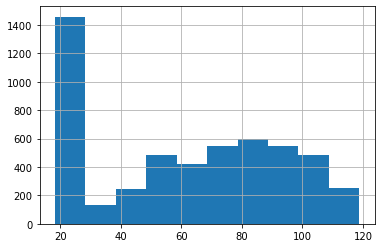

In [ ]:
# Non-Churned Customers

no_churn_sample = df[df.churn == 'No'].monthly_charges

no_churn_sample.hist()

In [ ]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [ ]:
# Overall monthly Charges Mean

overall_mean = df.monthly_charges.mean()

overall_mean

64.7616924605992

# ONE SAMPLE T-TEST (2 tail t-test) Example

In [ ]:
# ONE SAMPLE T-TEST (take p as is)


t, pval = stats.ttest_1samp(churn_sample, overall_mean)

alpha = 0.05

print("T-value",t, "| P-Value", pval, "| Alpha Val",alpha)

T-value 16.96540308050567 | P-Value 3.740639299382399e-60 | Alpha Val 0.05


# ONE SAMPLE T-TEST (1 -tail t-test p/2) Example

In [ ]:
# ONE TAIL(divide p/2)


t, pval = stats.ttest_1samp(churn_sample, overall_mean)

alpha = 0.05

print("T-value",t, "| P-Value", pval / 2, "| Alpha Val",alpha)

T-value 16.96540308050567 | P-Value 1.8703196496911995e-60 | Alpha Val 0.05


In [ ]:
# Decide Ho / H1

if (p / 2) > alpha:
    
    print("We fail to reject $H_{0}$")
    
elif t < 0:
    
    print("We fail to reject $H_{0}$")
    
else:
    
    print("We reject $H_{0}$")


We reject $H_{0}$


In [ ]:
# TWO TAILS (p)


t, pval = stats.ttest_1samp(churn_sample, overall_mean)

alpha = 0.05

print("T-value",t, "| P-Value", pval, "| Alpha Val",alpha)

T-value 16.96540308050567 | P-Value 3.740639299382399e-60 | Alpha Val 0.05


# TWO SAMPLE T-TEST

In [ ]:
print(churn_sample.var())
print(no_churn_sample.var())

608.4141833954315
966.7527670734293


In [ ]:


t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t, p/2

(18.407526676414673, 4.2962246657737696e-73)

In [ ]:
# Levene method checks if variance is equal

stats.levene(churn_sample, no_churn_sample)

LeveneResult(statistic=361.8444859598828, pvalue=1.0261244899421871e-78)

In [ ]:
# Decision for Two Sample t-test

if (p/2 < alpha) & (t > 0):
    
    print("Reject Ho")
    
else:
    
    print("Do not reject Ho")

Reject Ho


# ONE SAMPLE T-TEST

scipy.stats.ttest_1samp

compute mean of sample and overall mean then compare the two means

# TWO SAMPLE T-TEST

scipy.stats.ttest_ind

Compute the mean of sample and mean of (population - sample) and compare the two i.e. (churn vs no-charn comparison example)

# ANOVA TESTING

scipy.stats.stats.f_one_way

Compare several means of different samples

In [ ]:

df = sns.load_dataset('iris')

df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
setosa_sepal_length = df[df.species == 'setosa'].sepal_length


setosa_sepal_length

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal_length, dtype: float64

<AxesSubplot:>

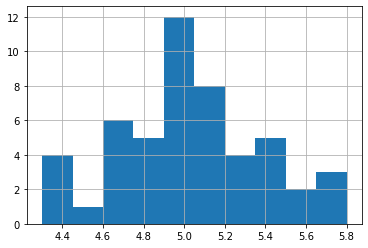

In [ ]:
setosa_sepal_length.hist()

In [135]:
versicolor_sepal_length = df[df.species == 'versicolor'].sepal_length
versicolor_sepal_length

50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
55    5.7
56    6.3
57    4.9
58    6.6
59    5.2
60    5.0
61    5.9
62    6.0
63    6.1
64    5.6
65    6.7
66    5.6
67    5.8
68    6.2
69    5.6
70    5.9
71    6.1
72    6.3
73    6.1
74    6.4
75    6.6
76    6.8
77    6.7
78    6.0
79    5.7
80    5.5
81    5.5
82    5.8
83    6.0
84    5.4
85    6.0
86    6.7
87    6.3
88    5.6
89    5.5
90    5.5
91    6.1
92    5.8
93    5.0
94    5.6
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: sepal_length, dtype: float64

<AxesSubplot:>

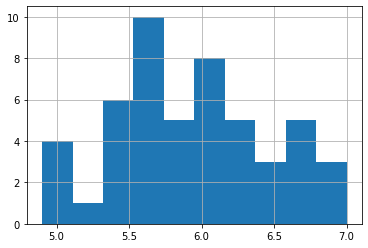

In [ ]:
versicolor_sepal_length.hist()

In [ ]:
virginica_sepal_length = df[df.species == 'virginica'].sepal_length
virginica_sepal_length

100    6.3
101    5.8
102    7.1
103    6.3
104    6.5
105    7.6
106    4.9
107    7.3
108    6.7
109    7.2
110    6.5
111    6.4
112    6.8
113    5.7
114    5.8
115    6.4
116    6.5
117    7.7
118    7.7
119    6.0
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, dtype: float64

<AxesSubplot:>

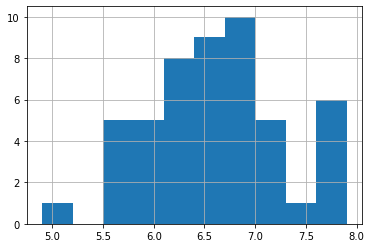

In [ ]:
virginica_sepal_length.hist()

In [ ]:
print("Setosa Var(): ", setosa_sepal_length.var())

print("Versicolor Var(): ", versicolor_sepal_length.var())

print("Virginica Var(): ", virginica_sepal_length.var())

Setosa Var():  0.12424897959183666
Versicolor Var():  0.2664326530612246
Virginica Var():  0.40434285714285706


In [ ]:


f, p = stats.f_oneway(setosa_sepal_length, versicolor_sepal_length, virginica_sepal_length)

f, p

(119.26450218450468, 1.6696691907693826e-31)